<a href="https://colab.research.google.com/github/HisakaKoji/try/blob/main/%E7%95%B0%E5%B8%B8%E6%A4%9C%E7%9F%A520201208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [14]:
data

array([0.71071287, 0.66834056, 0.73812193, ..., 1.46932814, 1.32250084,
       1.42936329])

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('query_result_2020-12-08T07_33_02.953778Z.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,28,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
df['Jst Tm'] = pd.to_datetime(df['Jst Tm'])

In [28]:
df['date'] = df['Jst Tm'].dt.date

In [56]:
collect = df.groupby(['date']).size()

In [67]:
collect.values

array([ 291,   35,  440,  369,  389,  474,  378,   46,  334,  386,  436,
        379,  383,  376,  400,  329,  379,  391,  397,  350,  295,  340,
        331,  323,  404,  451,  455, 1014,  582,  471,  516,  670,  732,
        631,  603,  515,  511,  623,  532,  484,  478,  806,  522,  472,
        482,  481,  486,  568,  516,  674,  617,  614,  557,  472,  361,
        521, 1041,  508,  452,  515,   77])

In [69]:
data

array([ 291,   35,  440,  369,  389,  474,  378,   46,  334,  386,  436,
        379,  383,  376,  400,  329,  379,  391,  397,  350,  295,  340,
        331,  323,  404,  451,  455, 1014,  582,  471,  516,  670,  732,
        631,  603,  515,  511,  623,  532,  484,  478,  806,  522,  472,
        482,  481,  486,  568,  516,  674,  617,  614,  557,  472,  361,
        521, 1041,  508,  452,  515,   77])

In [71]:
yt

array([479.54608788, 440.6356782 , 361.63553109, 395.52835859,
       453.32756469, 397.6517719 , 413.09062658, 487.99480664,
       454.41882727, 417.51239768, 391.81491211, 417.72995367,
       415.14031628, 419.7165363 , 407.24503098, 430.72778154,
       433.15881266, 583.68246303, 428.51745742, 540.12243673,
       466.67059798, 653.40201411, 674.52011746, 619.01321706,
       556.04461244, 546.35729245, 639.52728598, 506.43838191,
       544.24723895, 552.0299458 , 516.4482756 , 599.55875462,
       477.08699301, 533.49758963, 444.68166598, 554.4945676 ,
       560.80376464, 519.23625772, 485.63988268, 558.15512554,
       540.37444693, 498.94138458, 514.44798187, 544.80973256,
       518.49673925, 569.07077403, 681.2606329 , 484.74112024,
       548.49374495, 409.31251028])

In [76]:
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR

data  = np.concatenate(
    [np.random.normal(0.7, 0.05, 300),
     np.random.normal(1.5, 0.05, 300),
     np.random.normal(0.6, 0.05, 300),
     np.random.normal(1.4, 0.05, 300)])
data = collect.values
model = AR(data)
result = model.fit()
sigma = result.sigma2
yt = result.predict()
omicron = 0.0005
score = []
for i in range(len(yt)):
    print(data[i]-yt[i])
    print(-0.5*(data[i]-yt[i])**2)
    print(math.exp(-0.000005*(data[i]-yt[i])**2))
    score.append(-math.log(1/(2*math.pi**0.5*sigma**0.5)*math.exp(-0.0005*(data[i]-yt[i])**2)))
# 平滑化
window_size = 15
zt = []
s = []
for i in range(0, len(score)-window_size):
    for t in range(1, window_size+1):
        s.append(score[i+t]/window_size)
    zt.append(sum(s)/window_size)
    s = []

-188.54608787830398
-17774.813627106563
0.8371532454765428
-405.63567819874623
-82270.15171387841
0.4392434265746088
78.36446890970183
-3070.4949937498122
0.9697616591072313
-26.528358586206878
-351.87690463918807
0.996487414566381
-64.32756468571552
-2069.0177891974568
0.9795223952556212
76.34822809680406
-2914.5259667608107
0.971275367081995
-35.09062657624452
-615.676036756719
0.9938621536452893
-441.9948066448229
-97679.7045504972
0.37651513042232737
-120.4188272739836
-7250.346981020748
0.9300625195142559
-31.512397681725645
-496.5156038256139
0.9950471499734721
44.18508789233721
-976.1609960267821
0.9902858799027805
-38.7299536729372
-750.0046557539308
0.9925280086094755
-32.140316283016375
-516.4999653861638
0.9948483160218331
-43.716536301777296
-955.5677731123061
0.9904898326810238
-7.245030980730007
-26.245236955868805
0.9997375820680516
-101.72778153752586
-5174.2707682732935
0.9495731532920537
-54.15881266197789
-1466.5884944776083
0.9854411353247258
-192.6824630294916
-185

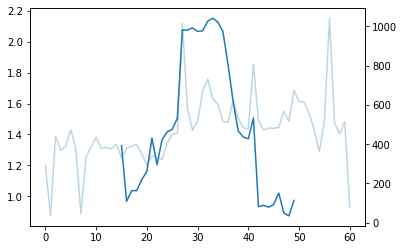

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(window_size, len(zt)+window_size), zt, label="score")
ax2 = ax.twinx()
ax2.plot(data, alpha=0.3, label="observation")

In [78]:
flag = False
for i in range(len(zt)):
    if zt[i] > 1 and flag == False:
        print("異常値:",zt[i], "異常発生点:" , i)
        flag = True
    if zt[i] < 0.1:
        flag = False

異常値: 1.3272713278287 異常発生点: 0


# 新しいセクション

# 第二段階学習も実装

In [5]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#zt = scaler.fit_transform(np.array(zt).reshape(-1, 1))

In [79]:
model2 = AR(zt)

In [80]:
result2 = model2.fit()
sigma2 = result2.sigma2*10
yt2 = result2.predict()

In [81]:
yt2

array([1.421688  , 1.60614528, 1.62441616, 1.68906202, 1.97773894,
       2.0337619 , 2.01656515, 2.10205997, 2.12356625, 2.22595309,
       2.13687858, 2.08858115, 1.82323794, 1.69984916, 1.5453841 ,
       1.39239965, 1.30606887, 1.20364322, 1.20847977, 0.83060146,
       0.87290856, 0.91735741, 1.01778225, 1.09081433, 0.90939221,
       1.00246668])

In [82]:
score2 = []
for i in range(len(yt2)):
    score2.append(-math.log((1/(2*math.pi**0.5*sigma2**0.5))*math.exp(-0.5*(zt[i]-yt2[i])**2)))
# 平滑化
window_size2 = 50
zt2 = []
s2 = []
for i in range(0, len(score2)-window_size2):
    for t in range(1, window_size2+1):
        s2.append(score2[i+t]/window_size2)
    zt2.append(sum(s2)/window_size2)
    s2 = []

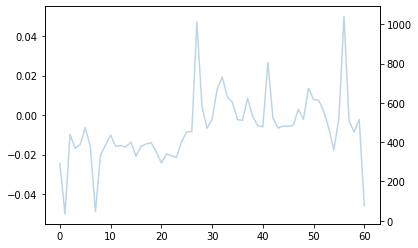

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(window_size+window_size2, len(zt2)+window_size+window_size2), zt2, label="score")
ax2 = ax.twinx()
ax2.plot(data, alpha=0.3, label="observation")

# 本家のChangeFinder

In [84]:
!pip install changefinder

In [85]:
import changefinder

cf = changefinder.ChangeFinder(r=0.03, order=1, smooth=7)
result3 = np.empty(len(data))
for i, d in enumerate(data):
    result3[i] = cf.update(d)

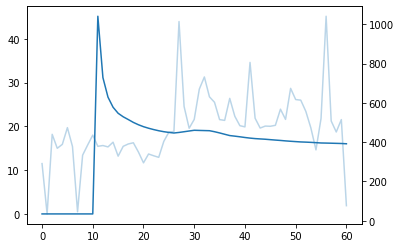

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(result3, label="score")
ax2 = ax.twinx()
ax2.plot(data, alpha=0.3, label="observation")

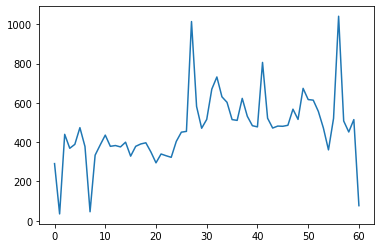

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data, label="score")
